Importing Libraries

In [8]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
#from PIL import Image

Setting constants

In [9]:
IMAGE_SIZE = 1024
BATCH_SIZE = 10
CHANNELS = 3
EPOCHS = 100

Loading data into tensorflow dataset object

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

# Getting the class names
class_names = dataset.class_names
print(class_names)

Found 208 files belonging to 4 classes.
['-K', '-N', '-P', 'FN']


Visualizing some of the images

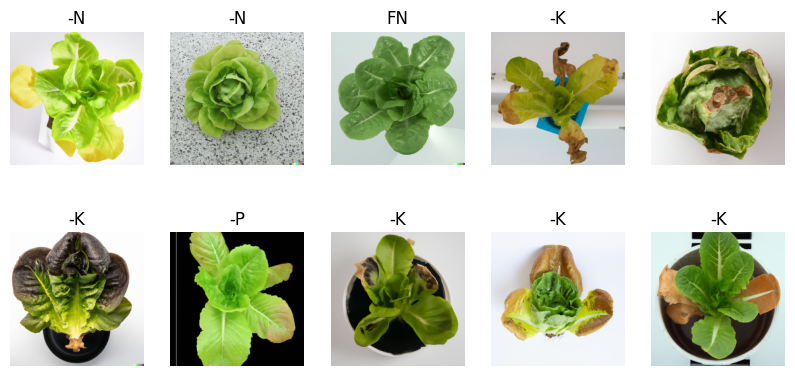

In [12]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(10):
    ax = plt.subplot(4,5,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

Constants for data splitting

In [13]:
dataset_size = len(dataset)       # 21 (number of pictures/batch_size)
train_size = 0.8                  # training = 10%
val_size = 0.1                    # validation = 10%
test_size = 0.1                   # test = 10%

Function for data splitting

In [14]:
def split_dataset(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
  assert (train_split + test_split + val_split) == 1
    
  ds_size = len(ds)
  
  if shuffle:
      ds = ds.shuffle(shuffle_size, seed=12)
  
  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)
  
  train_data = ds.take(train_size)    
  val_data = ds.skip(train_size).take(val_size)
  test_data = ds.skip(train_size).skip(val_size)

  return train_data, val_data, test_data

Data Splitting

In [15]:
train_data, val_data, test_data = split_dataset(dataset)
print(len(train_data), len(val_data), len(test_data))

16 2 3
